# SVM
> Support Vector Machines

참고 : http://hleecaster.com/ml-svm-concept/

**`Support Vectors는 결정 경계와 가까이 있는 데이터 포인트들을 의미`**

# Separating Line
SVM은 먼저 두 data를 나누는 Separating Line(Hyperplane)을 찾는다

## What makes a Good Separating Line
**두 data set의 가장 가까운 점과의 거리를 최대로 만드는 선이 optimized separating line**

separating line과 가장 가까운 점과의 거리는 `Margin`이라고 부르는데, 이 `Margin`을 최대화 하는 선이 최적의 선이다

## Outliers
outlier가 있을 땐, 일단 outlier를 제외한 최선의 선을 선택한다

## SVM in SKlearn
https://scikit-learn.org/stable/modules/svm.html

In [1]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]
clf = svm.SVC()
clf.fit(X, y)

SVC()

In [2]:
clf.predict([[2., 2.]])

array([1])

In [7]:
# get support vectors
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [4]:
# get indices of support vectors
clf.support_

array([0, 1])

In [5]:
# get number of support vectors for each class
clf.n_support_

array([1, 1])

## Quiz

In [ ]:
import sys
from class_vis import prettyPicture
from prep_terrain_data import makeTerrainData

import matplotlib.pyplot as plt
import copy
import numpy as np
import pylab as pl


features_train, labels_train, features_test, labels_test = makeTerrainData()


########################## SVM #################################
### we handle the import statement and SVC creation for you here
from sklearn.svm import SVC
clf = SVC(kernel="linear")


#### now your job is to fit the classifier
#### using the training features/labels, and to
#### make a set of predictions on the test data
clf.fit(features_train, labels_train)


#### store your predictions in a list named pred
pred = clf.predict(features_test)




from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, labels_test)

def submitAccuracy():
    return acc

결과
```
Here's your output:
0.92
```

# Nonlinear Data - Kernel Trick
> SVM은 단순히 직선을 긋는 것이 아니라 더 복잡한 선도 표현할 수 있다\
`svm에 x와 y 뿐만 아니라 x와 y의 관계또를 표현한 z(예를 들면, x^2+y^2)을 추가해서 데이터를 원하는 모양으로 정렬하여 분류할 수 있다`

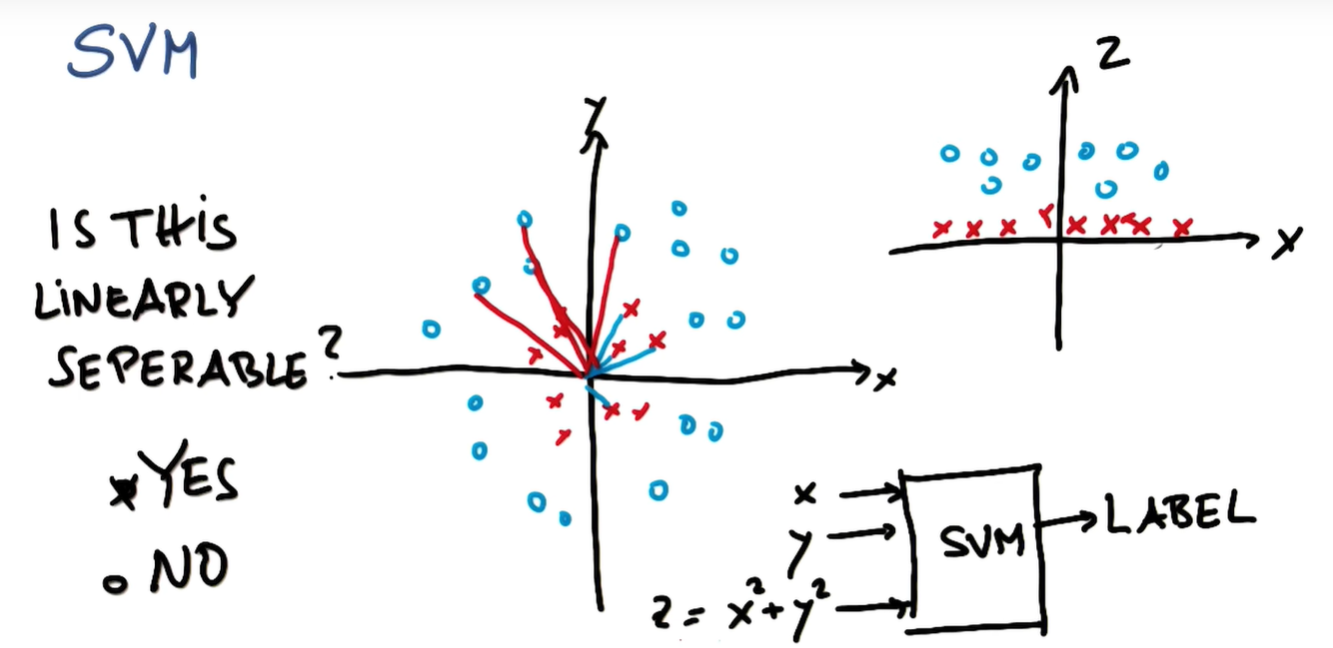

↑ x, y 데이터를 재정렬한 모습

## Kernel Trick
> https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-2%EC%84%9C%ED%8F%AC%ED%8A%B8-%EB%B2%A1%ED%84%B0-%EB%A8%B8%EC%8B%A0-SVM \

`x,y`(not separable) ==`Kernels`==> `x1,x2,x3,x4,x5`(separable)\
\
`Non Linear Separation` <==== `Get Solution`

위의 방식처럼 저차원 공간의 데이터를 고차원 공간의 데이터로 mapping\
=> 고차원 공간에서 solution을 얻고 이를 다시 저차원 공간으로 mapping

**굉장히 중요한 머신러닝 기법 중 하나**

## Quiz

In [ ]:
clf = SVC(kernel="linear")

위의 부분에서 kerenl 부분을 `linear`가 아닌 다른 종류, `poly`, `rbf`, `sigmoid`, `precomputed`, or **callable**로 대체 가능

# Parameters for SVM

- `kernel`
- `C` : 얼마나 많은 Sample이 다른 클래스에 놓이는지(예외) 허용하는 것을 결정
- `gamma` : 하나의 데이터 샘플이 영향력을 행사하는 거리 // gamma가 클수록 거리가 짧아지고 작을수록 멀어짐

> https://bskyvision.com/163
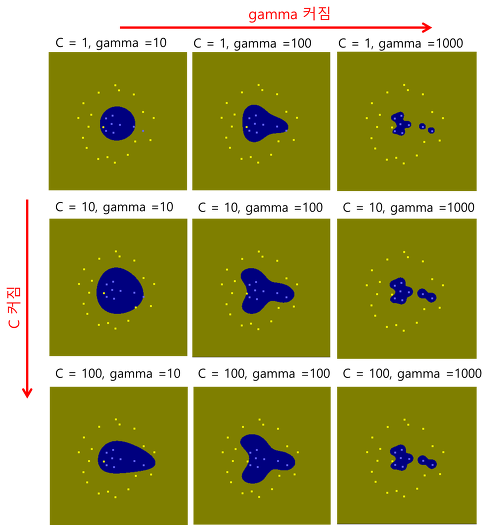

# Overfitting
> 과도하게 fitting된 것 / 이를 막기 위해 SVM의 C, gamma, Kernel을 잘 조정해야 함